# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [1]:
import matplotlib.pyplot as plt
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd



In [40]:
  
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/random-forest-project-tutorial/main/titanic_train.csv') 
print(df_raw)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [42]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
df_raw.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1,0,113806,53.1000,E8,S
392,393,0,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.9250,NaN,S
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q
427,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S
175,176,0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,NaN,S
383,384,1,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1,0,113789,52.0000,NaN,S
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S
767,768,0,3,"Mangan, Miss. Mary",female,30.5,0,0,364850,7.7500,NaN,Q
359,360,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q


In [44]:
df_raw['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [45]:
df_raw['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [46]:
df_transform=df_raw.drop(['Cabin','PassengerId','Ticket','Name'],axis=1)

In [47]:
# dos variables nuevas
df_transform['Sex_encoded']=df_transform['Sex'].apply(lambda x: 1 if x=="female" else 0)

In [50]:
df_transform['Embarked_S']=df_transform['Embarked'].apply(lambda x: 1 if x=="S" else 0)

In [51]:
df_transform['Embarked_C']=df_transform['Embarked'].apply(lambda x: 1 if x=="C" else 0)

In [57]:
df_transform['Age_clean']=df_transform['Age'].fillna(30)

In [52]:
df=df_transform.copy()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    object 
 8   Sex_encoded  891 non-null    int64  
 9   Embarked_S   891 non-null    int64  
 10  Embarked_C   891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [53]:
X=df.drop(['Survived'],axis=1)

In [25]:
y=df['Survived']

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=70)

In [54]:
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare
count,668.000000,531.000000,668.000000,668.000000,668.000000
mean,2.324850,29.900659,0.482036,0.371257,31.951222
std,0.838099,14.618189,1.014723,0.810286,51.201019
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,30.178100
max,3.000000,80.000000,8.000000,5.000000,512.329200


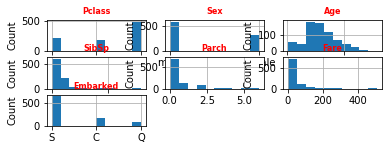

In [27]:
for index, i in enumerate(X):
    plt.subplot(6,3,index+1) 
    df1=df[i].hist()
    df1.plot(kind='bar')
    plt.title(f"{i}", fontsize=8, color= 'red', fontweight='bold')
    plt.ylabel('Count')
plt.Figure(figsize=(16,16))    
plt.show()

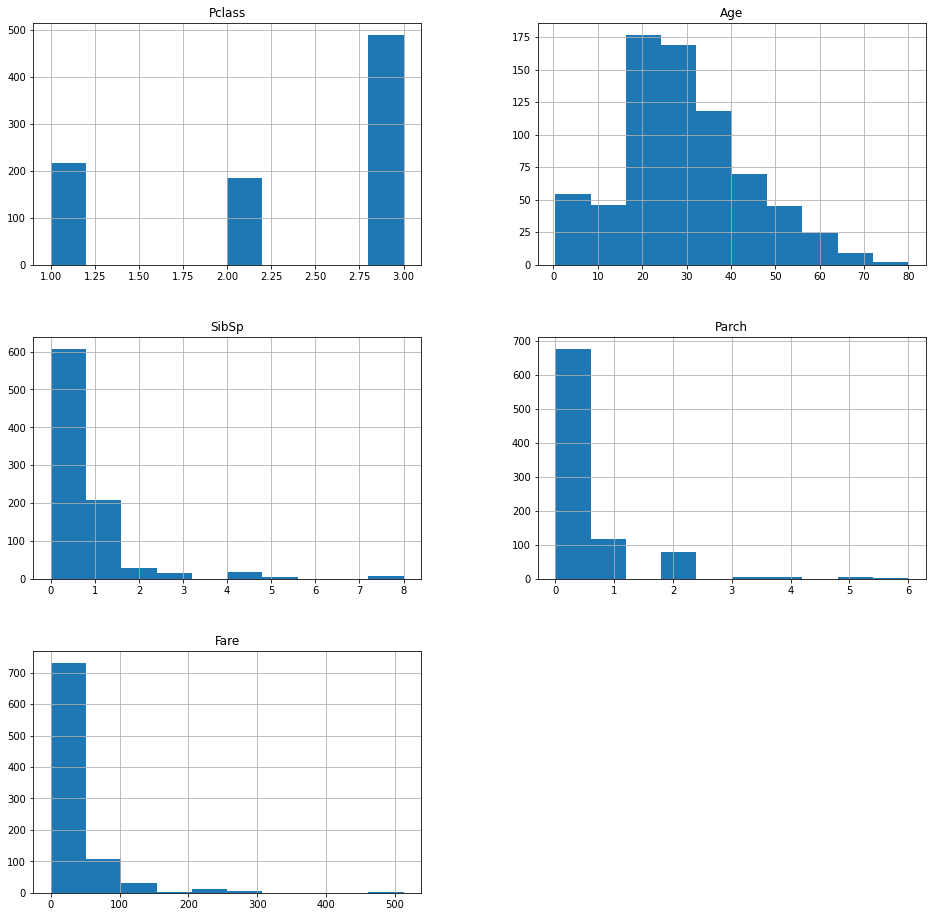

In [28]:
X.hist(figsize=(16,16))
plt.show()

In [ ]:
# grafica de boxplot



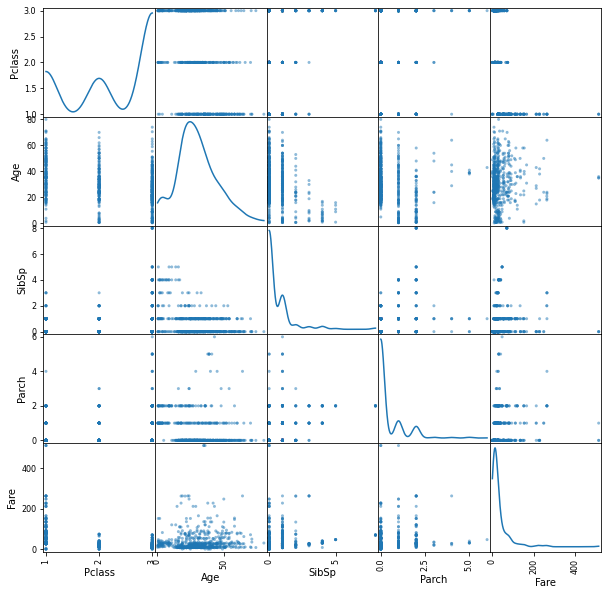

In [30]:
# scatter matrix

pd.plotting.scatter_matrix(X, diagonal='kde',figsize=(10,10))
plt.show()

In [32]:
# hacemos el calculo de la correlacion vemos que hay correlaciones
# En caso que sea mayor que 0.7 me quedo con una de las 2
# aca es -0.54

X.corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [35]:
classifier = RandomForestClassifier(random_state=1107)